In [1]:
import torch
import lightning as L
from torch.utils.data import TensorDataset,DataLoader
# custom modules
from word_embedding import WordEmbeddings
from utils import plot_token_relations , vectorize_text, get_weights

In [2]:
input_texts = ["Roads ? Where we're going we don't need roads","It's alive! It's alive!","May the Force be with you.","Life finds a way"]

In [3]:
eos_symbol = '<eos>'
input_texts = [input_text.lower() + f' {eos_symbol}' for input_text in input_texts]

In [4]:
vocabulary = []
for text in input_texts:
    vocabulary.extend(text.split(' '))
vocabulary = list(set(vocabulary))

In [5]:
vocabulary

['a',
 'way',
 'need',
 'alive!',
 'may',
 "don't",
 'you.',
 'force',
 '<eos>',
 'be',
 'roads',
 'the',
 'with',
 'life',
 'going',
 '?',
 'where',
 'we',
 "it's",
 "we're",
 'finds']

In [6]:
input_encodings = []
label_encodings = []
for text in input_texts:
    inputs,labels = vectorize_text(eos_symbol,text,vocabulary)
    input_encodings.extend(inputs)
    label_encodings.extend(labels)

In [7]:
len(input_encodings[0])


21

In [8]:
len(label_encodings[0])

21

In [9]:
inputs = torch.tensor(input_encodings)
labels = torch.tensor(label_encodings)
dataset = TensorDataset(inputs,labels)
dataloader = DataLoader(dataset)

In [10]:
len(vocabulary)

21

In [11]:
word_embedding = WordEmbeddings(vocab_size=len(vocabulary),network_width=3)

Pre training parameters


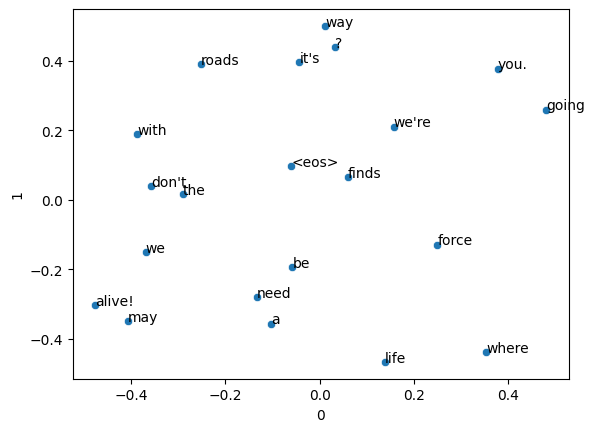

In [12]:
print('Pre training parameters')
plot_token_relations(word_embedding,vocabulary)

In [13]:
trainer = L.Trainer(max_epochs=150)
trainer.fit(word_embedding,train_dataloaders=dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | CrossEntropyLoss | 0     
  | other params | n/a              | 126   
--------------------------------------------------
126       Trainable params
0         Non-trainable params
126       Total params
0.001     Total estimated model params size (MB)
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\loops\fit_loop.py:293: The number of

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=150` reached.


Post training parameters


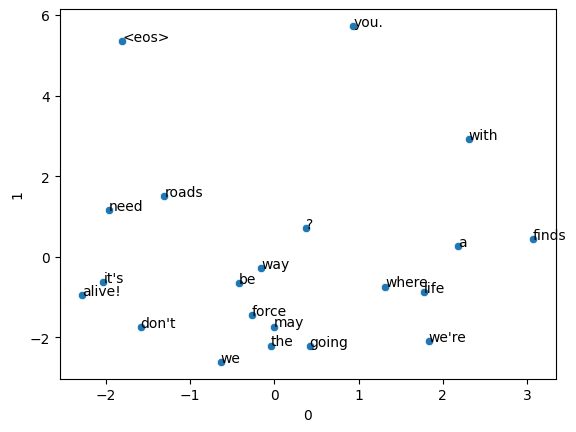

In [14]:
print('Post training parameters')
plot_token_relations(word_embedding,vocabulary)

In [15]:
weights_df = get_weights(word_embedding,vocabulary)

In [16]:
weights_df

,0,1,2,token
0,2.184844,0.266063,-3.426512,a
1,-0.155813,-0.273916,-5.666689,way
2,-1.963029,1.152744,0.437466,need
3,-2.279235,-0.955099,1.024549,alive!
4,-0.006140,-1.733706,0.386079,may
5,-1.584552,-1.742278,-0.729125,don't
6,0.938561,5.728534,-1.667732,you.
7,-0.265322,-1.451197,2.206132,force
8,-1.802587,5.356321,-4.631085,<eos>
9,-0.417235,-0.645658,2.569599,be
